## Mission 2. Abengers, Assemble!

### 코어 미션

다음 질문에 답하시오.
- 캐릭터는 저마다 지능, 힘, ... 등 다양한 수치를 지니고 있다. 이러한 __수치의 합이 가장 큰 캐릭터__는 누구인가? 이를 보이기 위한 과정을 보여라.
- 좋은 캐릭터와 나쁜 캐릭터의 능력치들의 수치 분포를 알고 싶다. 이를 표현하기 위한 적절한 그래프를 선택해서 이를 위한 전처리를 진행하고, 시각화하여라.

In [1]:
## 라이브러리 불러오기

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
## 데이터 불러오기

hero_df = pd.read_csv("./charcters_stats.csv")

### 1. 분석의 목적과 변수 확인

In [6]:
## 상위 5개 데이터 확인하기

hero_df.head(5)

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
4,Abomination,bad,63,80,53,90,55,95,436


In [7]:
## 각 Column의 데이터 타입 확인하기
hero_df.dtypes

Name            object
Alignment       object
Intelligence     int64
Strength         int64
Speed            int64
Durability       int64
Power            int64
Combat           int64
Total            int64
dtype: object

### 2. 데이터 전체적으로 살펴보기

In [8]:
## 데이터 전체 정보를 얻는 함수: .describe()

hero_df.describe()

,Intelligence,Strength,Speed,Durability,Power,Combat,Total
count,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000
mean,44.502455,29.083470,27.306056,41.839607,40.312602,43.206219,226.250409
std,32.924722,32.610939,25.760173,36.543849,34.539910,33.270329,167.324034
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,5.000000
25%,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,5.000000
50%,50.000000,10.000000,23.000000,32.000000,37.000000,50.000000,255.000000
75%,75.000000,53.000000,42.000000,80.000000,67.000000,70.000000,351.500000
max,113.000000,100.000000,100.000000,120.000000,100.000000,101.000000,581.000000


In [9]:
## 상관계수 확인!

hero_df.corr()

,Intelligence,Strength,Speed,Durability,Power,Combat,Total
Intelligence,1.000000,0.565508,0.619845,0.683933,0.720550,0.783679,0.856352
Strength,0.565508,1.000000,0.640657,0.793649,0.639829,0.575045,0.824557
Speed,0.619845,0.640657,1.000000,0.704255,0.683467,0.594568,0.813902
Durability,0.683933,0.793649,0.704255,1.000000,0.756840,0.679583,0.907441
Power,0.720550,0.639829,0.683467,0.756840,1.000000,0.653452,0.873359
Combat,0.783679,0.575045,0.594568,0.679583,0.653452,1.000000,0.839966
Total,0.856352,0.824557,0.813902,0.907441,0.873359,0.839966,1.000000


In [10]:
## 결측치 확인

hero_df.isnull()

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
606,False,False,False,False,False,False,False,False,False
607,False,False,False,False,False,False,False,False,False
608,False,False,False,False,False,False,False,False,False
609,False,False,False,False,False,False,False,False,False


In [11]:
hero_df.isnull().sum()

Name            0
Alignment       3
Intelligence    0
Strength        0
Speed           0
Durability      0
Power           0
Combat          0
Total           0
dtype: int64

### 3. 데이터의 개별 속성 파악하기

#### 코어미션 1번째: 수치의 합이 가장 큰 캐릭터는 누구인가?

In [18]:
## 편한 네임 출력을 위해 인덱스 변경
hero_mod_df = hero_df.set_index('Name')
hero_mod_df

,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
Name,,,,,,,,
3-D Man,good,50,31,43,32,25,52,233
A-Bomb,good,38,100,17,80,17,64,316
Abe Sapien,good,88,14,35,42,35,85,299
Abin Sur,good,50,90,53,64,84,65,406
Abomination,bad,63,80,53,90,55,95,436
...,...,...,...,...,...,...,...,...
Yellowjacket,good,88,10,12,28,12,14,164
Yellowjacket II,good,50,10,35,28,31,28,182
Ymir,good,50,100,27,100,83,28,388


In [20]:
## 수치의 합이 가장 큰 캐릭터 조회
hero_mod_df['Total'].idxmax()

'Martian Manhunter'

#### 코어미션 2번째: 좋은 캐릭터와 나쁜 캐릭터의 능력치들의 수치 분포
1. 좋은 캐릭터, 나쁜 캐릭터, 중립 캐릭터의 능력치 수치 분포를 능력치마다 하나씩 비교
2. 종합한 능력치 수치 분포를 Alignment마다 하나씩 비교
3. 좋은 캐릭터, 나쁜 캐릭터, 중립 캐릭터의 능력치 평균치 비교

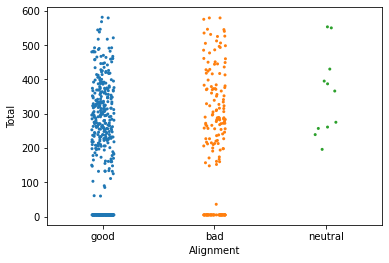

In [41]:
## 좋은 캐릭터, 나쁜 캐릭터, 중립 캐릭터의 능력치 수치 분포 능력치마다 하나씩 비교,
## 1번째: 총합

s = sns.stripplot(x='Alignment', y='Total', data=hero_df, size = 3)
plt.show()

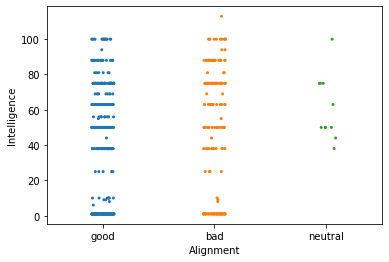

In [42]:
## 2번째: 지능

s = sns.stripplot(x='Alignment', y='Intelligence', data=hero_df, size = 3)
plt.show()

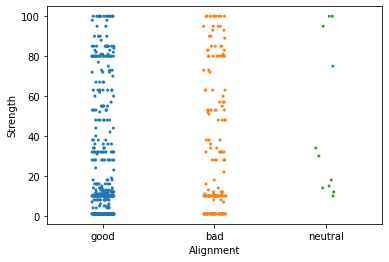

In [43]:
## 3번째: 근력

s = sns.stripplot(x='Alignment', y='Strength', data=hero_df, size = 3)
plt.show()

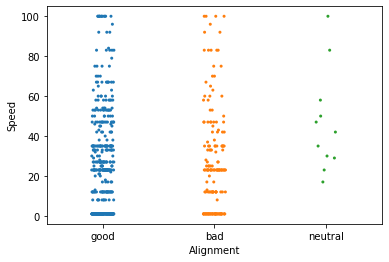

In [44]:
## 4번째: 스피드

s = sns.stripplot(x='Alignment', y='Speed', data=hero_df, size = 3)
plt.show()

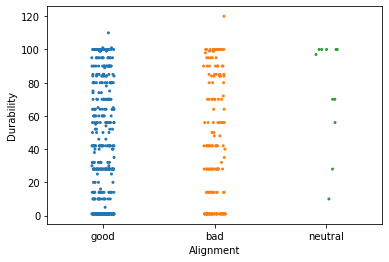

In [45]:
## 5번째: 인내성

s = sns.stripplot(x='Alignment', y='Durability', data=hero_df, size = 3)
plt.show()

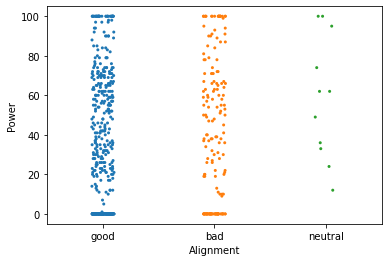

In [46]:
## 6번째: 힘(화력)

s = sns.stripplot(x='Alignment', y='Power', data=hero_df, size = 3)
plt.show()

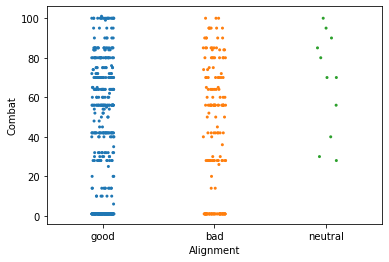

In [47]:
## 7번째: 격투

s = sns.stripplot(x='Alignment', y='Combat', data=hero_df, size = 3)
plt.show()

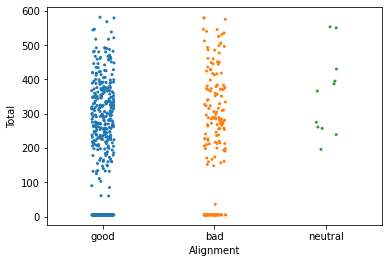

In [48]:
## 분석 결과 착한 히어로와 나쁜 히어로가 특정 능력치에 특출나는 성향은 별로 없으나
## 총합 능력치로 따지면 나쁜 히어로가 상대적으로 전체적인 능력치가 높은 히어로가 많다는 것을 알 수 있다.

s = sns.stripplot(x='Alignment', y='Total', data=hero_df, size = 3)
plt.show()

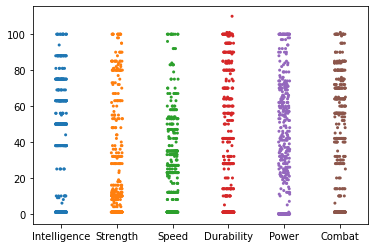

In [61]:
## 종합한 능력치 수치 분포를 Alignment마다 하나씩 비교
## 1번째: 착한 캐릭터

hero_nosum_df = hero_df.drop('Total', axis = 1)
hero_good_df = hero_nosum_df[hero_nosum_df.Alignment == 'good']

s = sns.stripplot(data=hero_good_df, size = 3)
plt.show()

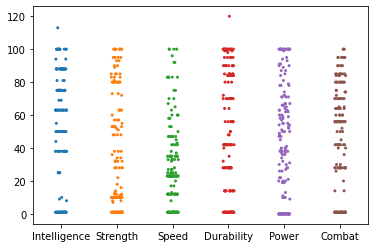

In [62]:
## 2번째: 나쁜 캐릭터
hero_bad_df = hero_nosum_df[hero_nosum_df.Alignment == 'bad']

s = sns.stripplot(data=hero_bad_df, size = 3)
plt.show()

In [67]:
## 좋은 캐릭터, 나쁜 캐릭터, 중립 캐릭터의 능력치 평균치 비교

hero_mean_df = hero_nosum_df.groupby('Alignment').mean()
hero_mean_df

,Intelligence,Strength,Speed,Durability,Power,Combat
Alignment,,,,,,
bad,50.018182,34.363636,27.684848,46.284848,44.230303,44.630303
good,41.995370,26.638889,26.685185,39.293981,38.291667,42.085648
neutral,60.909091,45.727273,46.727273,75.545455,58.818182,67.636364


<AxesSubplot:xlabel='Alignment'>

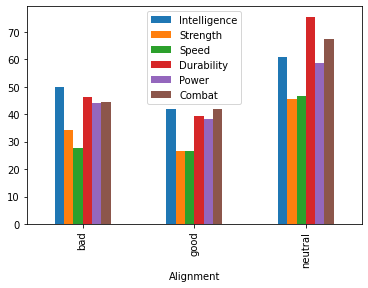

In [68]:
hero_mean_df.plot.bar()